In [3]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [5]:
df_churn = pd.read_csv('data/Telecom_customer_churn.csv', index_col = False)
print(df_churn.dtypes)
print(f'unique Value of our Target_class:  {df_churn.Churn.unique()}')
# Creating categorical values nto one hot encoding and dropping null values
#Removing missing values 
df_churn.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df_churn.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
# normalize features for better performance 
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

predictors_list = ['tenure','InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Electronic check',
       'OnlineSecurity_No', 'OnlineBackup_No', 'OnlineBackup_No internet service',  'StreamingTV_No internet service',
       'OnlineSecurity_No internet service','DeviceProtection_No','StreamingMovies_No internet service',
       'DeviceProtection_No internet service','TechSupport_No', 'TechSupport_No internet service','Contract_Two year','Contract_Month-to-month']

# min_max_scaler 

target = df_dummies['Churn']
X = df_dummies[predictors_list] # convert to numpy array
print(X.shape)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

print(x_scaled.shape)
df_churn_scaled = pd.DataFrame(x_scaled, columns=predictors_list)
df_churn_scaled['Churn'] = target
df_churn_scaled.head()

# customer data 

df_cust = pd.read_csv('data/purchase_propensity_data.csv', index_col = False)
print(df_cust.dtypes)
print(f'unique Value of our Target_class:  {df_cust.ordered.unique()}')

predictors_list = ['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk']

# min_max_scaler 

target_order = df_cust['ordered']
order_X = df_cust[predictors_list] # convert to numpy array
print(order_X.shape)
min_max_scaler = preprocessing.MinMaxScaler()
order_x_scaled = min_max_scaler.fit_transform(order_X)

print(order_x_scaled.shape)
df_order_scaled = pd.DataFrame(order_x_scaled, columns=predictors_list)
df_order_scaled['ordered'] = target_order
df_order_scaled.head()

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
unique Value of our Target_class:  ['No' 'Yes']
(7043, 16)
(7043, 16)
UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click          int64
detail_wishlist_add         int64
list_size_dropdown    

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0


In [6]:
X_churn = df_churn_scaled.drop('Churn', 1).copy().values
Y_churn = df_churn_scaled['Churn'].copy().values
X_cust = df_order_scaled.drop('ordered', 1).copy().values
Y_cust = df_order_scaled['ordered'].copy().values

In [ ]:
# Running PCA on churn data 

In [11]:
print(X_churn.shape)
dims_churn= list(range(2,10,1))

(7043, 16)


In [15]:
for component in dims_churn:
    pca = PCA(n_components=component, random_state=123)
    pca.fit_transform(X_churn)
    
    # reconstruction
    x_prime = pca.fit_transform(X_churn)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_churn, reconstructed)    
        
    print(component, ": ", sum(pca.explained_variance_ratio_), rc_err)

2 :  0.6703933521526357 0.1953845407256788
3 :  0.7417556824760445 0.18112769111146051
4 :  0.7921781436072195 0.1710542329961207
5 :  0.8399607586050446 0.16150816642134985
6 :  0.8825138276124974 0.1530068646461239
7 :  0.9238126150691971 0.14475614470254405
8 :  0.9625423662575847 0.13701866982207783
9 :  0.986926163086898 0.1321472464416514


In [18]:
comp = 7
pca = PCA(n_components=comp, random_state=123)
pca_result = pca.fit_transform(X_churn)
for i in range(comp):
    field_name = "pca-"+str(i)
#     X_churn[field_name] = pca_result[:,i]
    df_churn_scaled[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
X_churn_comp_7 = pca_result

Explained variation per principal component: [0.5176801  0.15271325 0.07136233 0.05042246 0.04778261 0.04255307
 0.04129879]


In [19]:
 df_churn_scaled.head()

,tenure,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,OnlineSecurity_No,OnlineBackup_No,OnlineBackup_No internet service,StreamingTV_No internet service,OnlineSecurity_No internet service,DeviceProtection_No,...,Contract_Two year,Contract_Month-to-month,Churn,pca-0,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6
0,0.013889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0,-0.888192,-0.605463,-0.083151,-0.545607,0.617597,0.464712,0.264191
1,0.472222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,-0.277676,0.543079,-0.567087,0.455339,-0.243084,0.075179,-0.759674
2,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1,-0.471523,-0.201112,-0.735609,-0.895470,0.178643,0.115111,-0.558850
3,0.625000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,-0.008545,0.811396,-0.649464,0.596965,-0.106515,0.352980,-0.376312
4,0.027778,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1,-1.330782,-0.772101,0.252208,0.226047,0.211206,-0.307160,0.118474


In [33]:
rndperm = np.random.permutation(df_churn_scaled.shape[0])


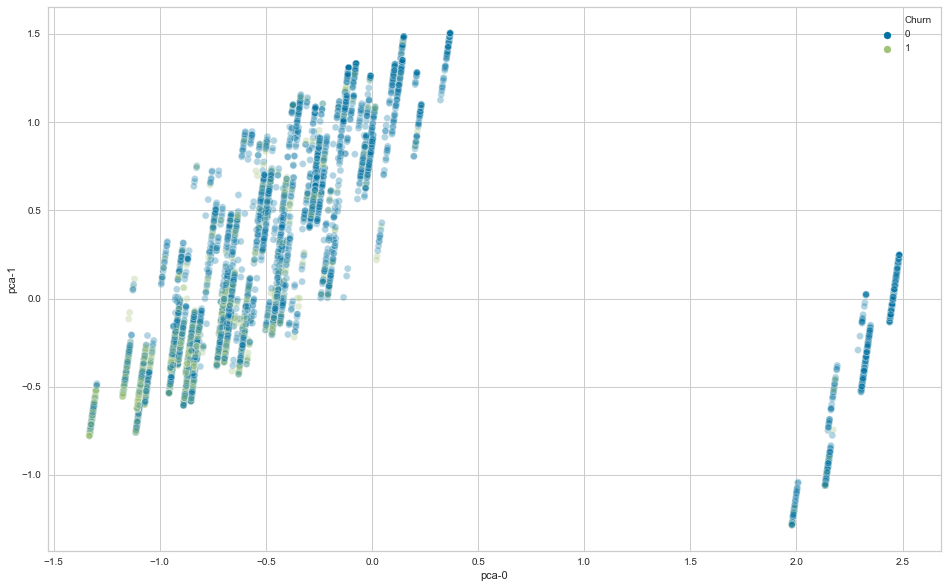

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="Churn",
    data=df_churn_scaled,
    legend="full",
    alpha=0.3
)

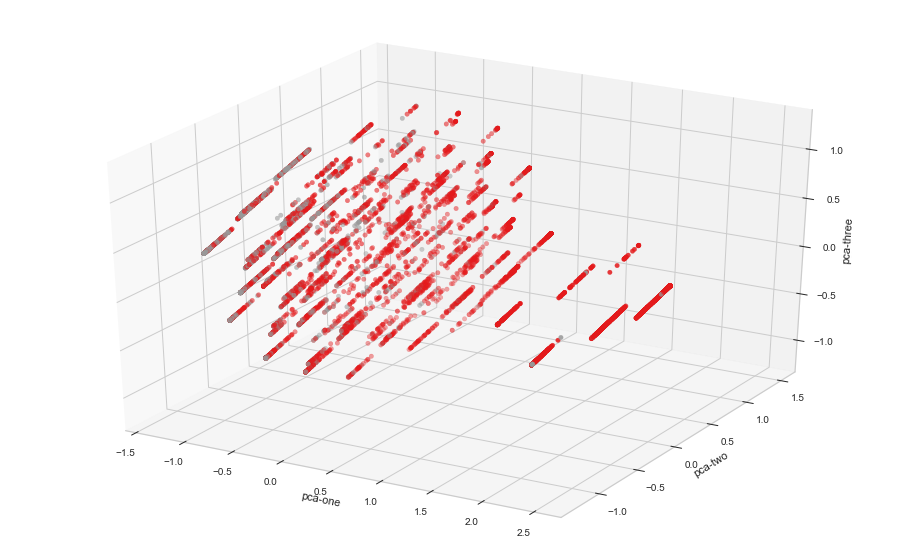

In [52]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_churn_scaled.loc[rndperm,:]["pca-0"], 
    ys=df_churn_scaled.loc[rndperm,:]["pca-1"], 
    zs=df_churn_scaled.loc[rndperm,:]["pca-2"],
    c=df_churn_scaled.loc[rndperm,:]["Churn"], 
    cmap='Set1'
    
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Clustering on DR for telecom  Clustering on DR

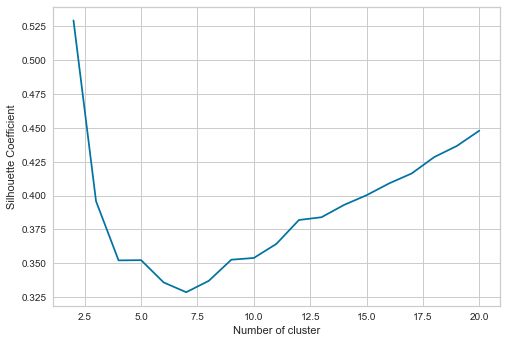

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score

silh_tel = {}
homog_tel = {}
for cluster_size in range(2,21):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=123).fit(X_churn_comp_7)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_churn_comp_7, label, metric='euclidean')
    homog_score = homogeneity_score(Y_churn, label)
    silh_tel[cluster_size] = sil_coeff
    homog_tel[cluster_size] = homog_score
plt.figure()
plt.plot(list(silh_tel.keys()), list(silh_tel.values()),'bx-' )
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

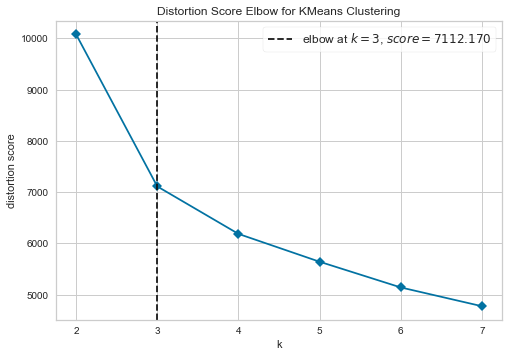

In [32]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,8), timings=False)
visualizer.fit(X_churn_comp_7)        # Fit the data to the visualizer
visualizer.show()   

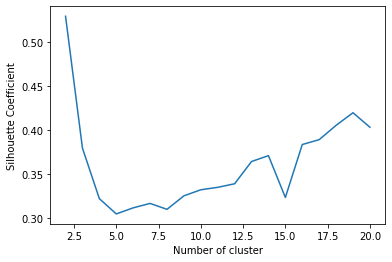

In [30]:
from sklearn.mixture import GaussianMixture 
silh_tel_em = {}
homog_tel_em = {}
ll_em_tel = {}
for cluster in range(2,21):
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=123, 
                          n_init=5).fit(X_churn_comp_7)
    label = gmm.predict(X_churn_comp_7)
    sil_coeff = silhouette_score(X_churn_comp_7, label, metric='euclidean')
    homog_score = homogeneity_score(Y_churn, label)
    silh_tel_em[cluster] = sil_coeff
    homog_tel_em[cluster] = homog_score
    ll_em_tel[cluster] = gmm.score(X_churn_comp_7)
plt.figure()
plt.plot(list(silh_tel_em.keys()), list(silh_tel_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Cust DATASET

In [40]:
print(X_cust.shape)
dims_cust= list(range(2,15,1))

(38186, 23)


In [43]:
for component in dims_cust:
    pca = PCA(n_components=component)
    pca.fit_transform(X_cust)
    
    # reconstruction
    x_prime = pca.fit_transform(X_cust)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_cust, reconstructed)    
    
    print(component, ": ", sum(pca.explained_variance_ratio_), rc_err)

2 :  0.5137255274964194 0.20558333462896022
3 :  0.60601178896846 0.1936831775200306
4 :  0.6837931153944635 0.18365340721787296
5 :  0.7484119644249153 0.17532091608219655
6 :  0.8043018241364613 0.16811401333465503
7 :  0.8430207243967959 0.1631212767254055
8 :  0.8779572519658603 0.15861627066837639
9 :  0.9008013612707306 0.1556705614652321
10 :  0.9177816306228698 0.15348098449225145
11 :  0.9340674681919854 0.15138095332149937
12 :  0.9488108367699125 0.14947982091464834
13 :  0.9624551325135036 0.14772041208824352
14 :  0.9727414068226724 0.14639401443824354


In [44]:
pca = PCA(n_components=9)
pca_result = pca.fit_transform(X_cust)
for i in range(8):
    field_name = "pca-"+str(i)
    df_order_scaled[field_name] = pca_result[:,i]
df_cust_pca_transformed = pca_result
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.38691782 0.12680771 0.09228626 0.07778133 0.06461885 0.05588986
 0.0387189  0.03493653 0.02284411]


In [142]:
rndperm = np.random.permutation(df_order_scaled.shape[0])


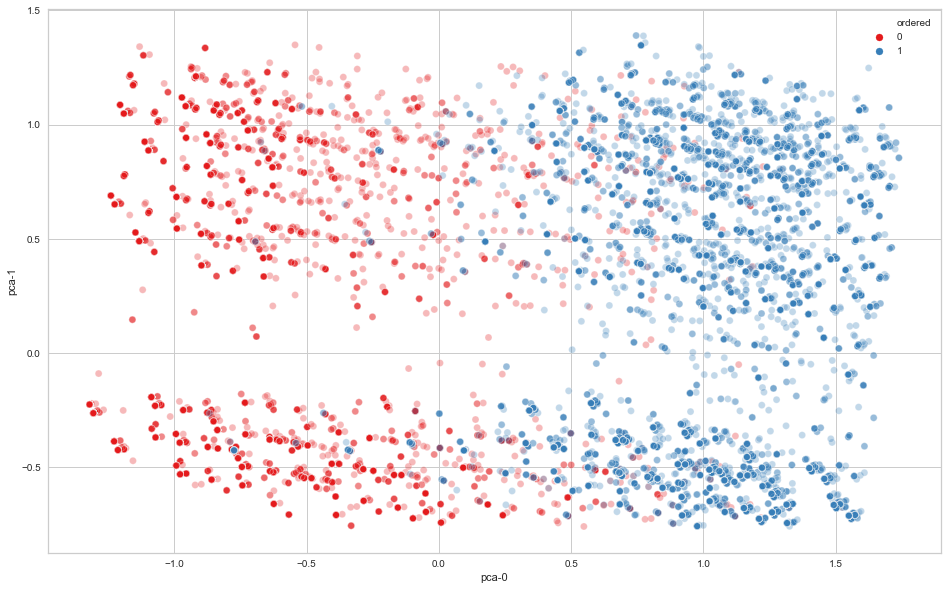

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="ordered",
    palette=sns.color_palette('Set1', 2),
    data=df_order_scaled,
    legend="full",
    alpha=0.3
)

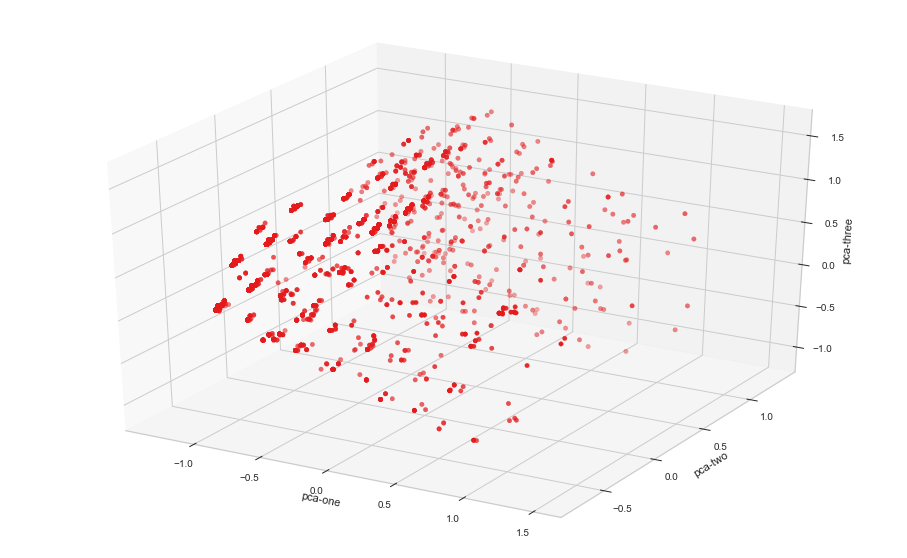

In [51]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_order_scaled.loc[rndperm,:]["pca-0"], 
    ys=df_order_scaled.loc[rndperm,:]["pca-1"], 
    zs=df_order_scaled.loc[rndperm,:]["pca-2"], 
    c=df_order_scaled.loc[rndperm,:]["ordered"], 
    cmap='Set1'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Cust clustering on PCA

In [53]:
# em clustering on DR dataset 

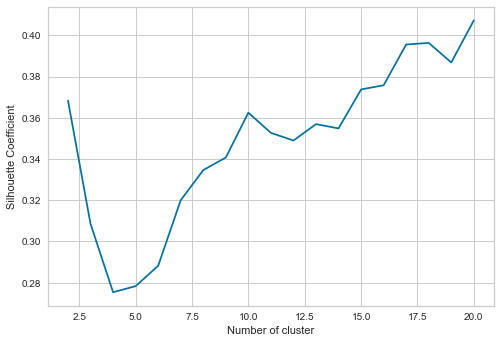

In [56]:
silh_cust = {}
homog_cust = {}
for cluster_size in range(2,21):
    kmeans = KMeans(n_clusters=cluster_size, max_iter=10000, random_state=123).fit(df_cust_pca_transformed )
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_cust_pca_transformed , label, metric='euclidean')
    homog_score = homogeneity_score(Y_cust, label)
    silh_cust[cluster_size] = sil_coeff
    homog_cust[cluster_size] = homog_score
plt.figure()
plt.plot(list(silh_cust.keys()), list(silh_cust.values()),'bx-' )
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

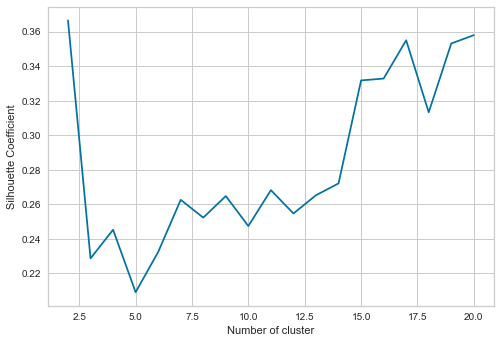

In [54]:
silh_cust_em = {}
homog_cust_em = {}
ll_em_cust = {}
for cluster in range(2,21):
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=123, 
                          n_init=5).fit(df_cust_pca_transformed )
    label = gmm.predict(df_cust_pca_transformed )
    sil_coeff = silhouette_score(df_cust_pca_transformed , label, metric='euclidean')
    homog_score = homogeneity_score(Y_cust, label)
    silh_cust_em[cluster] = sil_coeff
    homog_cust_em[cluster] = homog_score
    ll_em_cust[cluster] = gmm.score(df_cust_pca_transformed)
plt.figure()
plt.plot(list(silh_cust_em.keys()), list(silh_cust_em.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Neural Network on PCA

In [60]:
# best model from assignment 1 

nn_model = MLPClassifier(hidden_layer_sizes=(60,60), solver='adam', activation='logistic', 
                            learning_rate_init=0.01, random_state=100)

In [81]:
def learning_curve(estimator, X, y, title = "Learning curve"):
    """
    Plotting learning curve by running 3 fold cross validation
    we will be using f-1 score as we have seen there is class imbalance 
    """
    
    f1_train_mean = []
    f1_train_std = []  
    cv_mean = []
    cv_std = []  
    fit_mean = []
    fit_std = []  
    pred_mean = []
    pred_std = []  

    data_size_list = (np.linspace(.05, 1.0, 20) * len(y)).astype('int')

    for len_data in data_size_list:
        index = np.random.randint(X.shape[0], size=len_data)
        sampl_train_data = X.iloc[index, :]
        sampl_train_label = y.iloc[index]
        scores = cross_validate(estimator, sampl_train_data, sampl_train_label, cv=3, scoring='f1', return_train_score=True)

        f1_train_mean.append(np.mean(scores['train_score']))
        f1_train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score']))
        cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time']))
        fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time']))
        pred_std.append(np.std(scores['score_time']))

    f1_train_mean = np.array(f1_train_mean);
    f1_train_std = np.array(f1_train_std)
    cv_mean = np.array(cv_mean);
    cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean);
    fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean);
    pred_std = np.array(pred_std)
    
    
    # plotting Learning curve 
    plt.figure()
    plt.title("Learning curve : " + title)
    plt.xlabel("Training size")
    plt.ylabel("F1 Score")
    plt.fill_between(data_size_list, f1_train_mean - 2 * f1_train_std, f1_train_mean + 2 * f1_train_std, alpha=0.1)
    plt.fill_between(data_size_list, cv_mean - 2 * cv_std, cv_mean + 2 * cv_std, alpha=0.1)
    plt.plot(data_size_list, f1_train_mean, 'o-', label="Training Score")
    plt.plot(data_size_list, cv_mean, 'o-',label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
    # plotting time 
    plt.figure()
    plt.title("Time taken by classifier: " + title)
    plt.xlabel("Training size")
    plt.ylabel("Time  in (s)")
    plt.fill_between(data_size_list, fit_mean - 2 * fit_std, fit_mean + 2 * fit_std, alpha=0.1)
    plt.fill_between(data_size_list, pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, alpha=0.1)
    plt.plot(data_size_list, fit_mean, 'o-',  label="Training Time  in (s)")
    plt.plot(data_size_list, pred_std, 'o-', label="Prediction Time in (s)")
    plt.legend(loc="best")
    plt.show()


    # plot_times(data_size_list, fit_mean, fit_std, pred_mean, pred_std, title)

    return f1_train_mean, fit_mean, pred_mean

def get_and_save_metrics(true_labels, pred_labels, y_scores):
    """
    Using Sklearn Metrics, returns dataframe of all the relevant evaluation metrics
    for binary classification. 
    """
    
    accuracy = accuracy_score(true_labels, pred_labels)
    tn, fp, fn, tp = confusion_matrix(true_labels, pred_labels).ravel()
    precision_1 = precision_score(true_labels, pred_labels, pos_label=1)
    precision_0 = precision_score(true_labels, pred_labels, pos_label=0)
    recall_1 = recall_score(true_labels, pred_labels, pos_label=1)
    recall_0 = recall_score(true_labels, pred_labels, pos_label=0)
    f1_score_1 = f1_score(true_labels, pred_labels, pos_label=1)

    f1_score_0 = f1_score(true_labels, pred_labels, pos_label=0)
    auc_score = roc_auc_score(true_labels, y_scores)
    metrics = [[accuracy, tn, tp, fn, fp, precision_1, precision_0, recall_1, recall_0, f1_score_1, f1_score_0, auc_score]]
    metrics_df = pd.DataFrame(metrics)
    metrics_df.columns = ['accuracy', 'true_negative', 'true_positive', 'false_negative', 'false_positive',
                          'precision_class_1', 'precision_class_0', 'recall_class_1', 'recall_class_0',
                          'f1_score_class_1', 'f1_score_class_0', 'roc_auc_score']
    return metrics_df

def split_data(df,feature_ls, y_target, training: bool = False) -> None:
        """
        Split the data into train, test for model building
        
        returns the Test and train data
        """
        if training:
            df = df.sample(frac=1)
            X_train, X_test, y_train,y_test = train_test_split(df[feature_ls], df[y_target], test_size=0.2, random_state=123) 
            print(X_train.shape,X_test.shape)
            #changing object datatype to int 
            return X_train, X_test, y_train,y_test

In [86]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, average_precision_score, roc_curve, accuracy_score, make_scorer, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_recall_curve,average_precision_score, auc,f1_score, make_scorer, recall_score, accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, brier_score_loss,log_loss

predictors_list = ['pca-0', 'pca-1', 'pca-2', 'pca-3','pca-4', 'pca-5', 'pca-6']
X_train, X_test, y_train, y_test = split_data(df=df_churn_scaled,feature_ls=predictors_list, y_target='Churn',training= True)

(5634, 7) (1409, 7)


In [87]:
nn_model.fit(X_train, y_train)
preds = nn_model.predict(X_test)
y_scores = nn_model.predict_proba(X_test)[:,1]
# model metrics
get_and_save_metrics(y_test, preds, y_scores)

,accuracy,true_negative,true_positive,false_negative,false_positive,precision_class_1,precision_class_0,recall_class_1,recall_class_0,f1_score_class_1,f1_score_class_0,roc_auc_score
0,0.804826,941,193,173,102,0.654237,0.844704,0.527322,0.902205,0.583964,0.872508,0.844425


/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


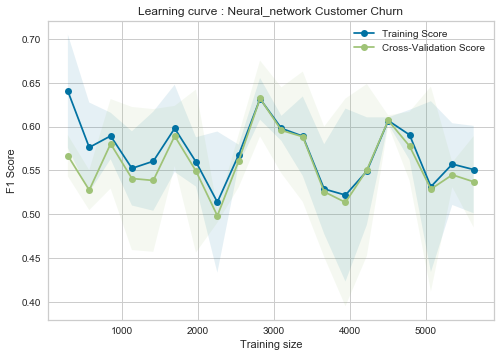

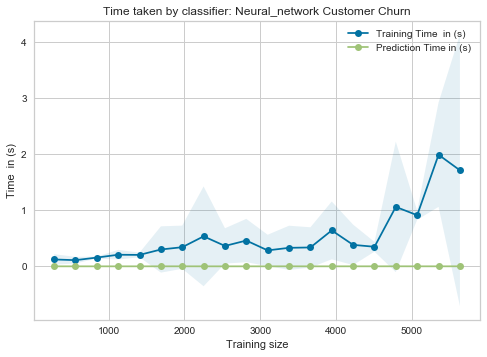

In [88]:
model_nn_train,model_nn_fit_time, model_nn_pred_time = learning_curve(nn_model, X_train, y_train, title= "Neural_network Customer Churn")

In [91]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1043
           1       0.65      0.53      0.58       366

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [92]:
# applying clustering and PCA components on newly generated data

### Kmeans with custer size as 3  on telecom dataset

In [127]:
kmeans = KMeans(n_clusters=3, n_init=50, max_iter=1000).fit(X_churn)
predict_label = kmeans.predict(X_churn)
df_churn_scaled['k_means_cluster'] = predict_label

In [95]:
df_churn_scaled[['pca-0', 'pca-1', 'pca-2', 'pca-3','pca-4', 'pca-5', 'pca-6', ]]

,tenure,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,OnlineSecurity_No,OnlineBackup_No,OnlineBackup_No internet service,StreamingTV_No internet service,OnlineSecurity_No internet service,DeviceProtection_No,...,Contract_Month-to-month,Churn,pca-0,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,k_means_cluster
0,0.013889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0,-0.888192,-0.605463,-0.083151,-0.545607,0.617597,0.464712,0.264191,1
1,0.472222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,-0.277676,0.543079,-0.567087,0.455339,-0.243084,0.075179,-0.759674,2
2,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1,-0.471523,-0.201112,-0.735609,-0.895470,0.178643,0.115111,-0.558850,1
3,0.625000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,-0.008545,0.811396,-0.649464,0.596965,-0.106515,0.352980,-0.376312,2
4,0.027778,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1,-1.330782,-0.772101,0.252208,0.226047,0.211206,-0.307160,0.118474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,-0.021793,0.700823,-0.699116,0.604569,-0.116877,0.384254,-0.375697,2
7039,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,-0.506994,0.700492,0.691837,-0.377348,-0.698802,0.027417,0.030625,2
7040,0.152778,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,-0.847025,-0.529263,-0.567387,0.220190,0.813406,-0.017749,-0.613701,1
7041,0.055556,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1,-1.173130,-0.538809,-0.218207,-0.072072,-0.541421,-0.502326,0.113504,1


In [128]:
df_pca_km = pd.get_dummies(df_churn_scaled, columns=['k_means_cluster'])

df_pca_km.columns

Index(['tenure', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'StreamingTV_No internet service', 'OnlineSecurity_No internet service',
       'DeviceProtection_No', 'StreamingMovies_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'Contract_Two year',
       'Contract_Month-to-month', 'Churn', 'pca-0', 'pca-1', 'pca-2', 'pca-3',
       'pca-4', 'pca-5', 'pca-6', 'em_cluster', 'k_means_cluster_0',
       'k_means_cluster_1', 'k_means_cluster_2'],
      dtype='object')

In [143]:
predictors_list = ['pca-0', 'pca-1', 'pca-2','k_means_cluster_0', 'k_means_cluster_1',
       'k_means_cluster_2']
X_train, X_test, y_train, y_test = split_data(df=df_pca_km,feature_ls=predictors_list, y_target='Churn',training= True)

(5634, 6) (1409, 6)


In [144]:
nn_model.fit(X_train, y_train)
preds = nn_model.predict(X_test)
y_scores = nn_model.predict_proba(X_test)[:,1]
# model metrics
get_and_save_metrics(y_test, preds, y_scores)

,accuracy,true_negative,true_positive,false_negative,false_positive,precision_class_1,precision_class_0,recall_class_1,recall_class_0,f1_score_class_1,f1_score_class_0,roc_auc_score
0,0.787793,928,182,189,110,0.623288,0.830797,0.490566,0.894027,0.54902,0.861253,0.820638


/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


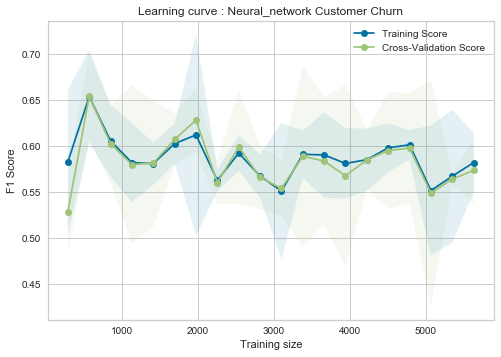

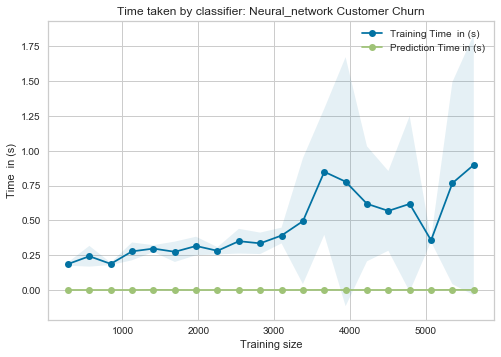

In [145]:
model_nn_train,model_nn_fit_time, model_nn_pred_time = learning_curve(nn_model, X_train, y_train, title= "Neural_network Customer Churn")

In [137]:
#EM  Clusters 

In [146]:
wine_em_gmm = GaussianMixture(n_components=4, max_iter=100, random_state=44, 
                      n_init=10).fit(X_churn)
df_churn_scaled['em_cluster']  = wine_em_gmm.predict(X_churn)

In [147]:
df_pca_em = pd.get_dummies(df_churn_scaled, columns=['em_cluster'])

df_pca_em.columns

Index(['tenure', 'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Electronic check', 'OnlineSecurity_No',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'StreamingTV_No internet service', 'OnlineSecurity_No internet service',
       'DeviceProtection_No', 'StreamingMovies_No internet service',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'Contract_Two year',
       'Contract_Month-to-month', 'Churn', 'pca-0', 'pca-1', 'pca-2', 'pca-3',
       'pca-4', 'pca-5', 'pca-6', 'k_means_cluster', 'em_cluster_0',
       'em_cluster_1', 'em_cluster_2', 'em_cluster_3'],
      dtype='object')

In [148]:
predictors_list = ['pca-0', 'pca-1', 'pca-2','em_cluster_0',
       'em_cluster_1', 'em_cluster_2', 'em_cluster_3']
X_train, X_test, y_train, y_test = split_data(df=df_pca_em,feature_ls=predictors_list, y_target='Churn',training= True)

(5634, 7) (1409, 7)


In [149]:
nn_model.fit(X_train, y_train)
preds = nn_model.predict(X_test)
y_scores = nn_model.predict_proba(X_test)[:,1]
# model metrics
get_and_save_metrics(y_test, preds, y_scores)

,accuracy,true_negative,true_positive,false_negative,false_positive,precision_class_1,precision_class_0,recall_class_1,recall_class_0,f1_score_class_1,f1_score_class_0,roc_auc_score
0,0.7956,917,204,171,117,0.635514,0.842831,0.544,0.886847,0.586207,0.864279,0.843813


/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vinayakraja/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


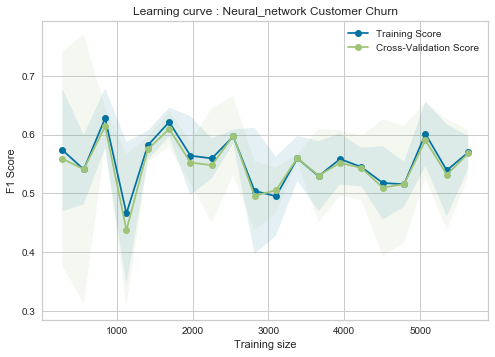

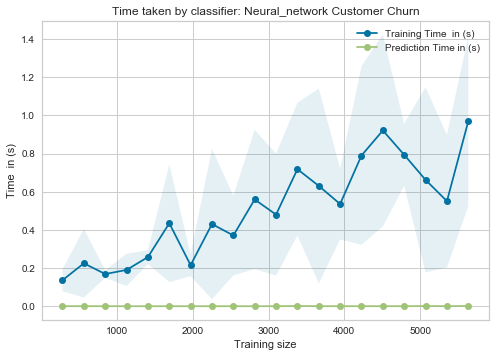

In [150]:
model_nn_train,model_nn_fit_time, model_nn_pred_time = learning_curve(nn_model, X_train, y_train, title= "Neural_network Customer Churn")